In [3]:
import os

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

In [17]:
e = pd.read_csv('./Energy/energy.csv', index_col=0)
f = pd.read_csv('./Finance/finance.csv', index_col=0)

e = e.groupby('Year').sum()
f = f.groupby('Year').sum()

# years = list(np.arange(2004, 2016))

# e = e[e['Year'].isin(years)]
# f = f[e['Year'].isin(years)]

[Text(0.5, 0, 'Renewable share electricity production (%)'),
 Text(1.5, 0, 'Renewable Energy Solar (Installed capacity) (MW)'),
 Text(2.5, 0, 'Renewables:Consumption (EJ)'),
 Text(3.5, 0, 'Electricity generation (TWh)'),
 Text(4.5, 0, 'Wind and solar share electricity production (%)'),
 Text(5.5, 0, 'Renewable Energy Wind  (Installed capacity) (MW)'),
 Text(6.5, 0, 'Electricity Consumption (TWh)'),
 Text(7.5, 0, 'Asset investment in renewables (Billions USD)'),
 Text(8.5, 0, 'Renewable installed PV Power (GW)'),
 Text(9.5, 0, 'Primary Energy: Consumption (EJ)'),
 Text(10.5, 0, 'Electricity Production (TWh)'),
 Text(11.5, 0, 'Electricity generation from other (TWh)'),
 Text(12.5, 0, 'Energy intensity level of primary energy (MJ/2011 USD PPP) '),
 Text(13.5, 0, 'Renewable electricity share of total electricity output (%) '),
 Text(14.5, 0, 'Renewable energy share of TFEC (%) '),
 Text(15.5, 0, 'Total electricity output (GWh) '),
 Text(16.5, 0, 'Total final energy consumption (TFEC) (TJ) 

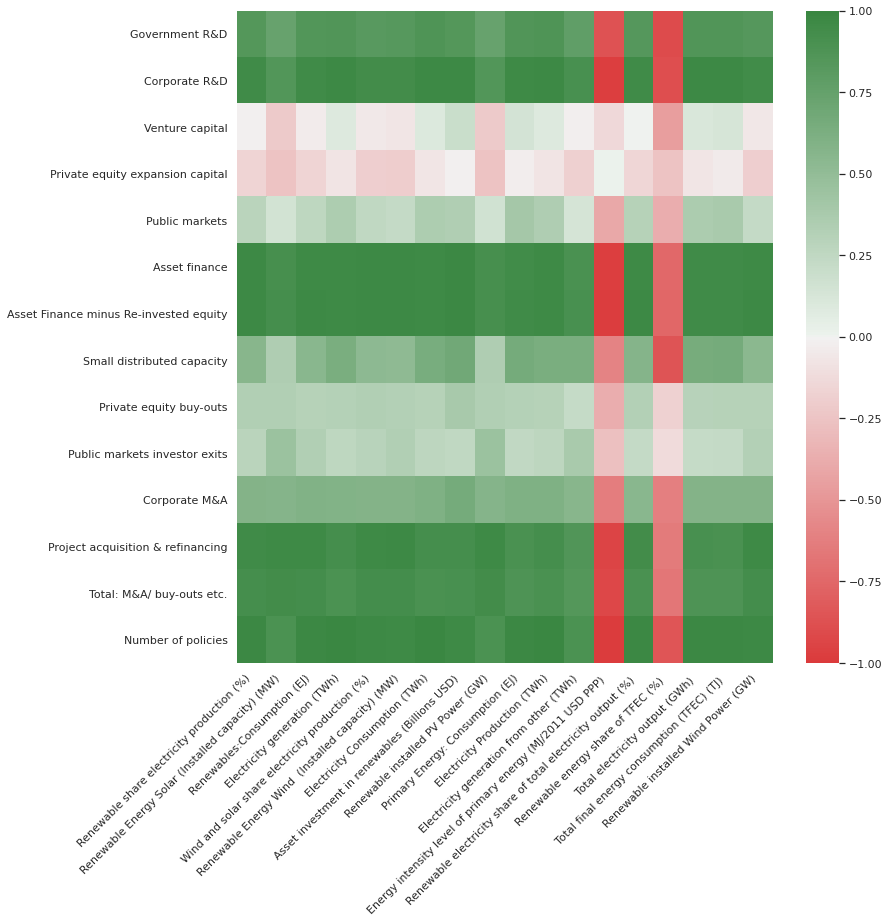

In [18]:
plt.figure(figsize=(12, 12))

corr = pd.concat([e, f], axis=1, keys=['e', 'f']).corr().loc['f', 'e']
# mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(12, 130, as_cmap=True)
h = sns.heatmap(corr, vmin=-1, vmax=1, cmap=cmap)
h.set_xticklabels(h.get_xticklabels(), rotation=45, ha='right')

In [19]:
def pca(df):
    pca = PCA(n_components=1)
    
    pca.fit(df.T)
    
    pca = pca.components_[0]
#     pca = pca / pca.max()
    
    return pca

In [5]:
e_pca = pca(e)
f_pca = pca(f)

<AxesSubplot:xlabel='Year'>

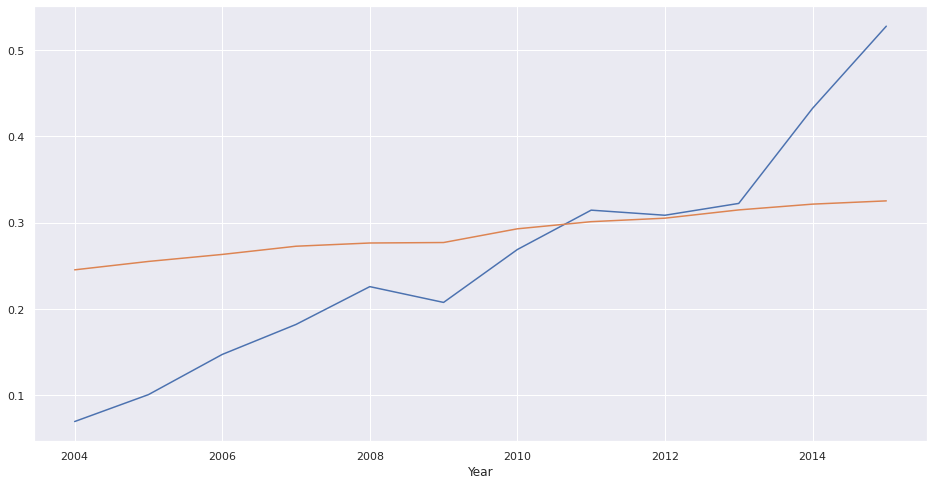

In [35]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=f.index, y=f_pca)
sns.lineplot(x=e.index, y =e_pca)

In [36]:
np.corrcoef(e_pca, f_pca)

array([[1.        , 0.96193556],
       [0.96193556, 1.        ]])